# **Logistic Regerssion** in plain Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost Function
def compute_cost(X, y, weights):
    z = np.dot(X, weights)
    predict_1 = y * np.log(sigmoid(z))
    predict_0 = (1 - y) * np.log(1 - sigmoid(z))
    return -sum(predict_1 + predict_0) / len(X)

# Gradient Descent Function to update weights
def gradient_descent(X, y, weights, lr, iterations):
    for _ in range(iterations):
        z = np.dot(X, weights)
        gradient = np.dot(X.T, sigmoid(z) - y) / len(X)
        weights -= lr * gradient
        if _ % 100 == 0:
            cost = compute_cost(X, y, weights)
            print(f'Cost at iteration {_}: {cost}')
    return weights

# Predict Function
def predict(X, weights):
    z = np.dot(X, weights)
    return [1 if i > 0.5 else 0 for i in sigmoid(z)]

In [11]:
# Example Data (X with bias term, and y as labels)
X = np.array([[1, 2], [1, 3], [1, 5], [1, 6]])  # Added bias term directly in data
y = np.array([0, 0, 0, 1])

# Initial weights
weights = np.zeros(X.shape[1])

# Train the model
lr = 0.1
iterations = 1000
weights = gradient_descent(X, y, weights, lr, iterations)

# Predicting with the model
predictions = predict(X, weights)

Cost at iteration 0: 0.6689831844119986
Cost at iteration 100: 0.5194421419961311
Cost at iteration 200: 0.43845901189594194
Cost at iteration 300: 0.3875508757015814
Cost at iteration 400: 0.35282556962311373
Cost at iteration 500: 0.32754876780906006
Cost at iteration 600: 0.30819852432198963
Cost at iteration 700: 0.29279196729993906
Cost at iteration 800: 0.2801390220307839
Cost at iteration 900: 0.2694859681376463


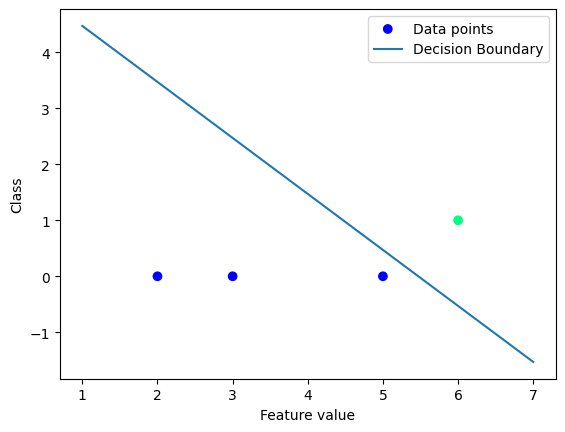

In [12]:
# Plotting decision boundary
plt.scatter(X[:, 1], y, c=y, cmap='winter', label='Data points')
plt.xlabel('Feature value')
plt.ylabel('Class')
x_values = [np.min(X[:, 1] - 1), np.max(X[:, 1] + 1)]
y_values = - (weights[0] + np.dot(weights[1], x_values)) / weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend()
plt.show()